In [1]:
from clean2_tmp2 import *
from analyze import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_turnstiles, df_ampm = data_wrangling()

In [3]:
df_turnstiles

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,AMPM,DAY_NAME,ZIPCODE,ZIPCODE_AGI
206706,2019-12-27 20:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,20:00:00,5554,420,PM,Friday,NaN,NaN
206705,2019-12-27 16:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,16:00:00,5554,420,PM,Friday,NaN,NaN
206704,2019-12-27 12:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,12:00:00,5554,420,PM,Friday,NaN,NaN
206703,2019-12-27 08:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,08:00:00,5554,420,AM,Friday,NaN,NaN
206702,2019-12-27 04:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,04:00:00,5554,420,AM,Friday,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2019-11-02 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/02/2019,16:00:00,7256668,2458902,PM,Saturday,NaN,NaN
3,2019-11-02 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/02/2019,12:00:00,7256401,2458844,PM,Saturday,NaN,NaN
2,2019-11-02 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/02/2019,08:00:00,7256298,2458759,AM,Saturday,NaN,NaN
1,2019-11-02 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/02/2019,04:00:00,7256283,2458724,AM,Saturday,NaN,NaN


In [4]:
df_ampm

,C/A,UNIT,SCP,STATION,DATE,AMPM,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,TMP_ENTRIES,TMP_EXITS,TRAFFIC
1,A002,R051,02-00-00,59 ST,11/02/2019,PM,Saturday,7256982,2458965,11/02/2019,7256298.0,2458759.0,684.0,206.0,890.0
2,A002,R051,02-00-00,59 ST,11/03/2019,AM,Sunday,7257271,2459060,11/02/2019,7256982.0,2458965.0,289.0,95.0,384.0
3,A002,R051,02-00-00,59 ST,11/03/2019,PM,Sunday,7258068,2459211,11/03/2019,7257271.0,2459060.0,797.0,151.0,948.0
4,A002,R051,02-00-00,59 ST,11/04/2019,AM,Monday,7258268,2459570,11/03/2019,7258068.0,2459211.0,200.0,359.0,559.0
5,A002,R051,02-00-00,59 ST,11/04/2019,PM,Monday,7259609,2459759,11/04/2019,7258268.0,2459570.0,1341.0,189.0,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547681,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2019,PM,Wednesday,5554,420,12/25/2019,5554.0,420.0,0.0,0.0,0.0
547682,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/26/2019,AM,Thursday,5554,420,12/25/2019,5554.0,420.0,0.0,0.0,0.0
547683,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/26/2019,PM,Thursday,5554,420,12/26/2019,5554.0,420.0,0.0,0.0,0.0
547684,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,AM,Friday,5554,420,12/26/2019,5554.0,420.0,0.0,0.0,0.0


In [5]:
df_daily = calculate_total_daily_traffic(df_ampm)

df_daily[df_daily["STATION"] == "34 ST-PENN STA"].head()

,STATION,DATE,DAY_NAME,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
3415,34 ST-PENN STA,11/02/2019,Saturday,70975.0,72454.0,143429.0
3416,34 ST-PENN STA,11/03/2019,Sunday,100460.0,96216.0,196676.0
3417,34 ST-PENN STA,11/04/2019,Monday,178176.0,162740.0,340916.0
3418,34 ST-PENN STA,11/05/2019,Tuesday,174898.0,160140.0,335038.0
3419,34 ST-PENN STA,11/06/2019,Wednesday,182354.0,165223.0,347577.0


### Here we have identified top 10 most trafficked stations based on total daily traffic

In [6]:
top_stations = (df_daily
     .groupby(["STATION"], as_index=False)
     .sum()
     .sort_values("DAILY_TRAFFIC", ascending=False))

top_stations_name = list(top_stations.STATION[:10])
top_stations_name

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 'TIMES SQ-42 ST',
 '14 ST-UNION SQ',
 '42 ST-PORT AUTH',
 '86 ST',
 'FULTON ST',
 '125 ST']

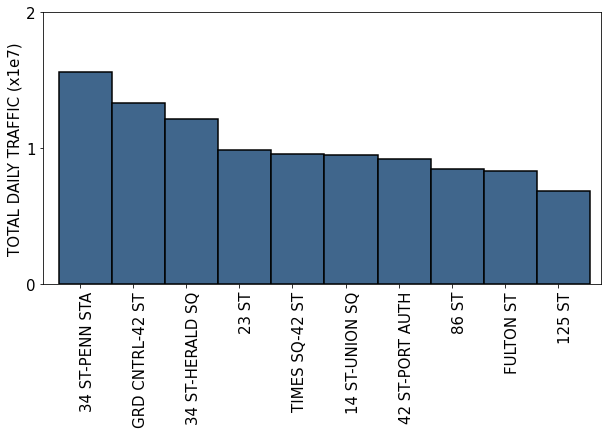

In [7]:
data_to_plot = top_stations[["STATION", "DAILY_TRAFFIC"]][:10]
data_to_plot["DAILY_TRAFFIC"] = data_to_plot["DAILY_TRAFFIC"]/1e7

y_label = "TOTAL DAILY TRAFFIC (x1e7)"
fontsize= 15
x_rot_ticklabel = 90
x_lim=(-0.7, 9.8)

plt.subplots(figsize=(10,5))
# plt.gcf().subplots_adjust(bottom=0.15)

handle = sns.barplot(x = 'STATION',y='DAILY_TRAFFIC',
                     data=data_to_plot, 
                     color=(0.2, 0.4, 0.6, 0.6),
                     edgecolor=(0,0,0),
                     linewidth=1.5)

plt.yticks(np.arange(0, 3))

set_axis(handle,
         y_label=y_label, 
         fontsize=fontsize, 
         rot_xticklabels=x_rot_ticklabel,
         x_lim=x_lim)

plt.savefig("../figures/total_daily_traffic_for_top_10_stations.svg", dpi=300, bbox_inches='tight')

### Here we calculated average daily traffic across all the top 10 most trafficked stations over the entire  selected period

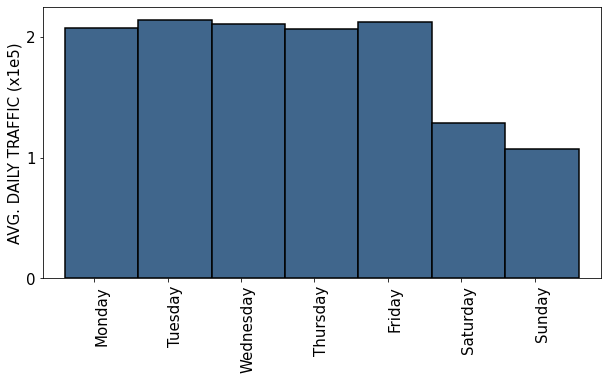

In [8]:
# calculate daily traffic based on daily entries and daily exits (not total here) 
df_daily
mask = generate_mask_for_top_stations(top_stations, top_stations_name, df_daily)
t = df_daily[mask].groupby(["DAY_NAME"]).mean() 
t = sort_by_day_name(t)
data_to_plot = t[["DAY_NAME2", "DAILY_TRAFFIC"]]
data_to_plot["DAILY_TRAFFIC"] = data_to_plot["DAILY_TRAFFIC"]/1e5

y_label = "AVG. DAILY TRAFFIC (x1e5)"
fontsize = 15
x_rot_ticklabel = 90
x_lim = (-0.7, 6.9)

plt.subplots(figsize=(10,5))

handle = sns.barplot(x = 'DAY_NAME2',y='DAILY_TRAFFIC',
                     data=data_to_plot, 
                     color=(0.2, 0.4, 0.6, 0.6),
                     edgecolor=(0,0,0),
                     linewidth=1.5)

plt.yticks(np.arange(0, 3))

set_axis(handle,
         y_label=y_label, 
         fontsize=fontsize, 
         rot_xticklabels=x_rot_ticklabel,
         x_lim=x_lim,
         horizontal_alignment="left",
         )

plt.savefig("../figures/avg_daily_traffic_overall.svg", dpi=300, bbox_inches='tight')

### Here we calculated daily average traffic across all the top 10 stations over the entire selected period

In [9]:
df_daily2 = calculate_daily_traffic_ampm(df_ampm)
df_daily2

,STATION,DATE,DAY_NAME,AMPM,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,1 AV,11/02/2019,Saturday,PM,5003.0,5976.0,10979.0
1,1 AV,11/03/2019,Sunday,AM,3431.0,3514.0,6945.0
2,1 AV,11/03/2019,Sunday,PM,4360.0,5252.0,9612.0
3,1 AV,11/04/2019,Monday,AM,5736.0,7914.0,13650.0
4,1 AV,11/04/2019,Monday,PM,12731.0,12348.0,25079.0
...,...,...,...,...,...,...,...
41853,ZEREGA AV,12/25/2019,Wednesday,PM,598.0,528.0,1126.0
41854,ZEREGA AV,12/26/2019,Thursday,AM,596.0,435.0,1031.0
41855,ZEREGA AV,12/26/2019,Thursday,PM,1433.0,1355.0,2788.0
41856,ZEREGA AV,12/27/2019,Friday,AM,649.0,606.0,1255.0


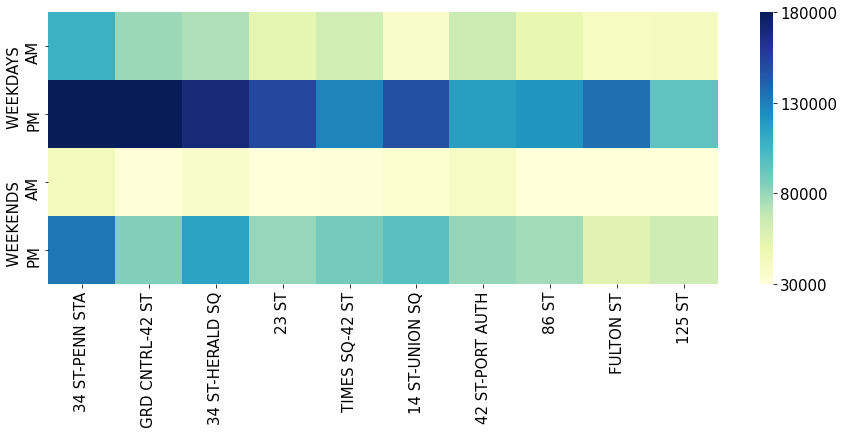

In [10]:
t_wkd_am, t_wkd_pm, t_wke_am, t_wke_pm = calculate_weekly_traffic_ampm_for_top_stations(top_stations, top_stations_name, df_daily2)

data_to_plot = np.zeros((4, len(top_stations_name)))
data_to_plot[0,:] = t_wkd_am["DAILY_TRAFFIC"].to_numpy()
data_to_plot[1,:] = t_wkd_pm["DAILY_TRAFFIC"].to_numpy()
data_to_plot[2,:] = t_wke_am["DAILY_TRAFFIC"].to_numpy()
data_to_plot[3,:] = t_wke_pm["DAILY_TRAFFIC"].to_numpy()

xticklabels = top_stations_name
yticklabels = ["AM", "PM","AM", "PM"]
y_label = "  WEEKENDS           WEEKDAYS     "
fontsize= 15
x_rot_ticklabel = 90

plt.subplots(figsize=(15,5))

handle = sns.heatmap(data_to_plot,cmap= "YlGnBu",
                annot=False,
                xticklabels=xticklabels, 
                yticklabels=yticklabels,
                vmin=3e4, vmax=0.18e6);

set_axis(handle,
         y_label=y_label, 
         fontsize=fontsize, 
         rot_xticklabels=x_rot_ticklabel,
         horizontal_alignment='center'
        )
cbar = handle.collections[0].colorbar
cbar.set_ticks(list(range(30000, 200000, 50000)))
cbar.ax.tick_params(labelsize=fontsize)
plt.savefig("../figures/weekly_ampm_average_traffic.svg", dpi=300, bbox_inches='tight')